<a href="https://colab.research.google.com/github/LCaravaggio/CienciadeDatos/blob/main/Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos

In [1]:
from vega_datasets import data
cars=data.cars()
cars

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


# EDA

In [2]:
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              406 non-null    object        
 1   Miles_per_Gallon  398 non-null    float64       
 2   Cylinders         406 non-null    int64         
 3   Displacement      406 non-null    float64       
 4   Horsepower        400 non-null    float64       
 5   Weight_in_lbs     406 non-null    int64         
 6   Acceleration      406 non-null    float64       
 7   Year              406 non-null    datetime64[ns]
 8   Origin            406 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 28.7+ KB


In [4]:
cars.describe()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,1975-12-30 13:49:57.044334976
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970-01-01 00:00:00
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,1973-01-01 00:00:00
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,1976-01-01 00:00:00
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,1979-01-01 00:00:00
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982-01-01 00:00:00
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,NaN


In [5]:
cars.isnull().sum()

,0
Name,0
Miles_per_Gallon,8
Cylinders,0
Displacement,0
Horsepower,6
Weight_in_lbs,0
Acceleration,0
Year,0
Origin,0


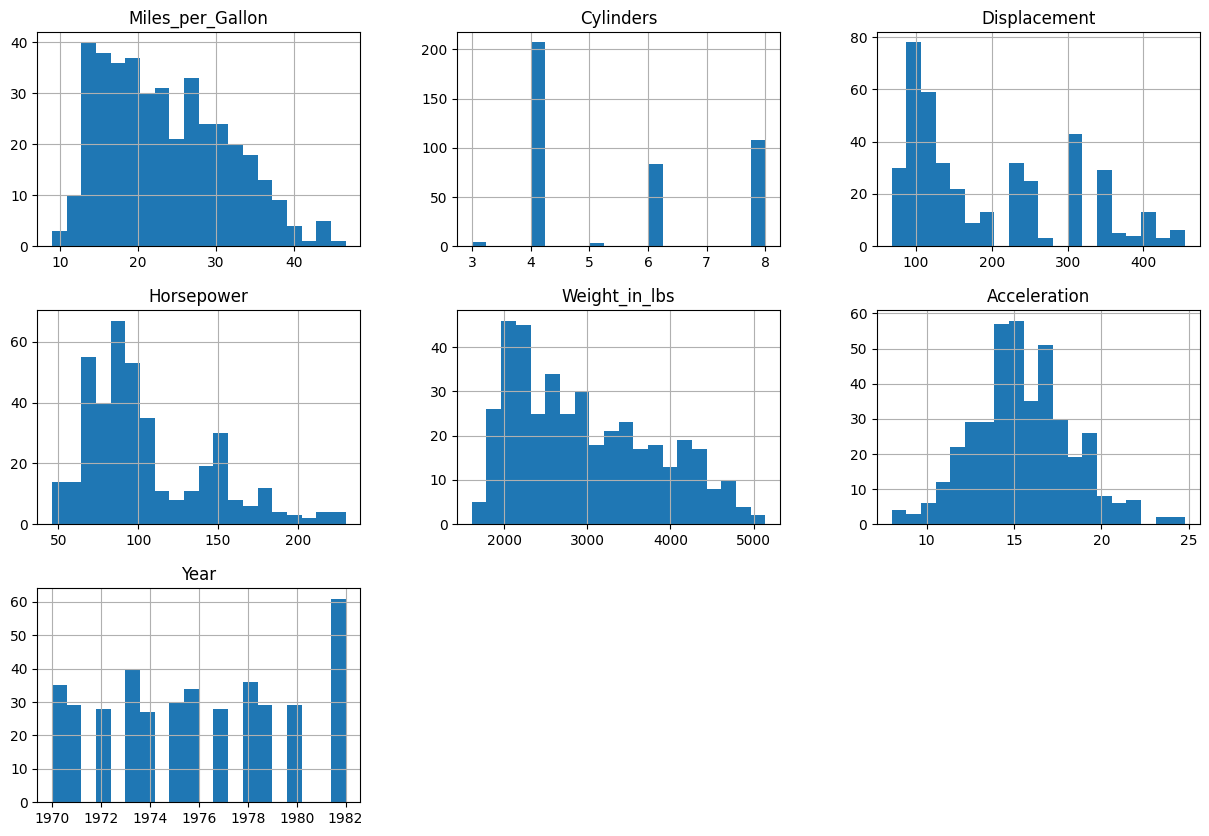

In [6]:
# Análisis univariado
# Histograma para cada característica numérica

import matplotlib.pyplot as plt
cars.hist(bins=20, figsize=(15, 10))
plt.show()

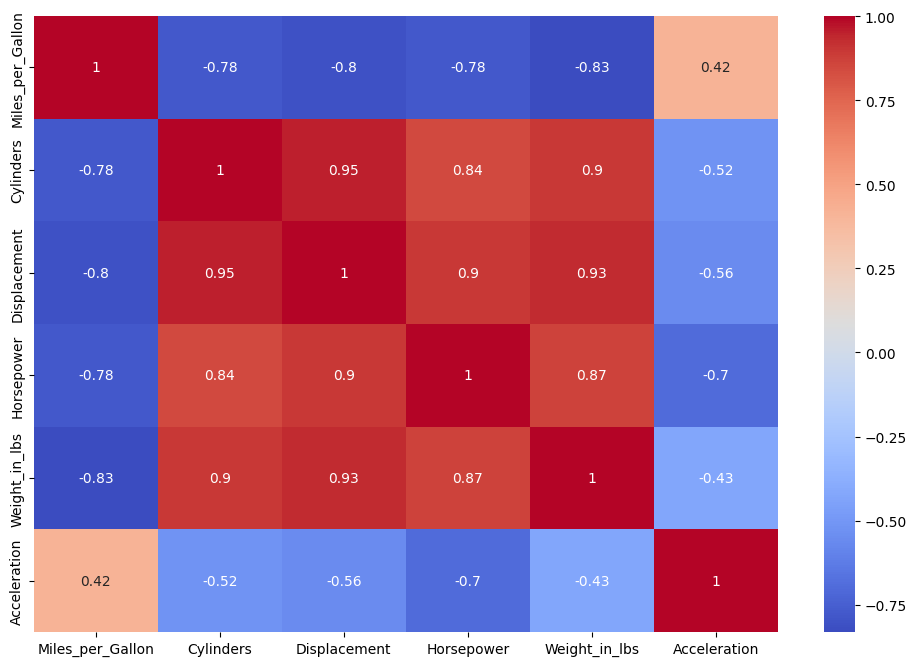

In [9]:
# Análisis bivariado
# Matriz de correlación
import seaborn as sns

numeric_cars = cars.select_dtypes(include=[float, int])
correlation_matrix = numeric_cars.corr()

correlation_matrix = numeric_cars.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

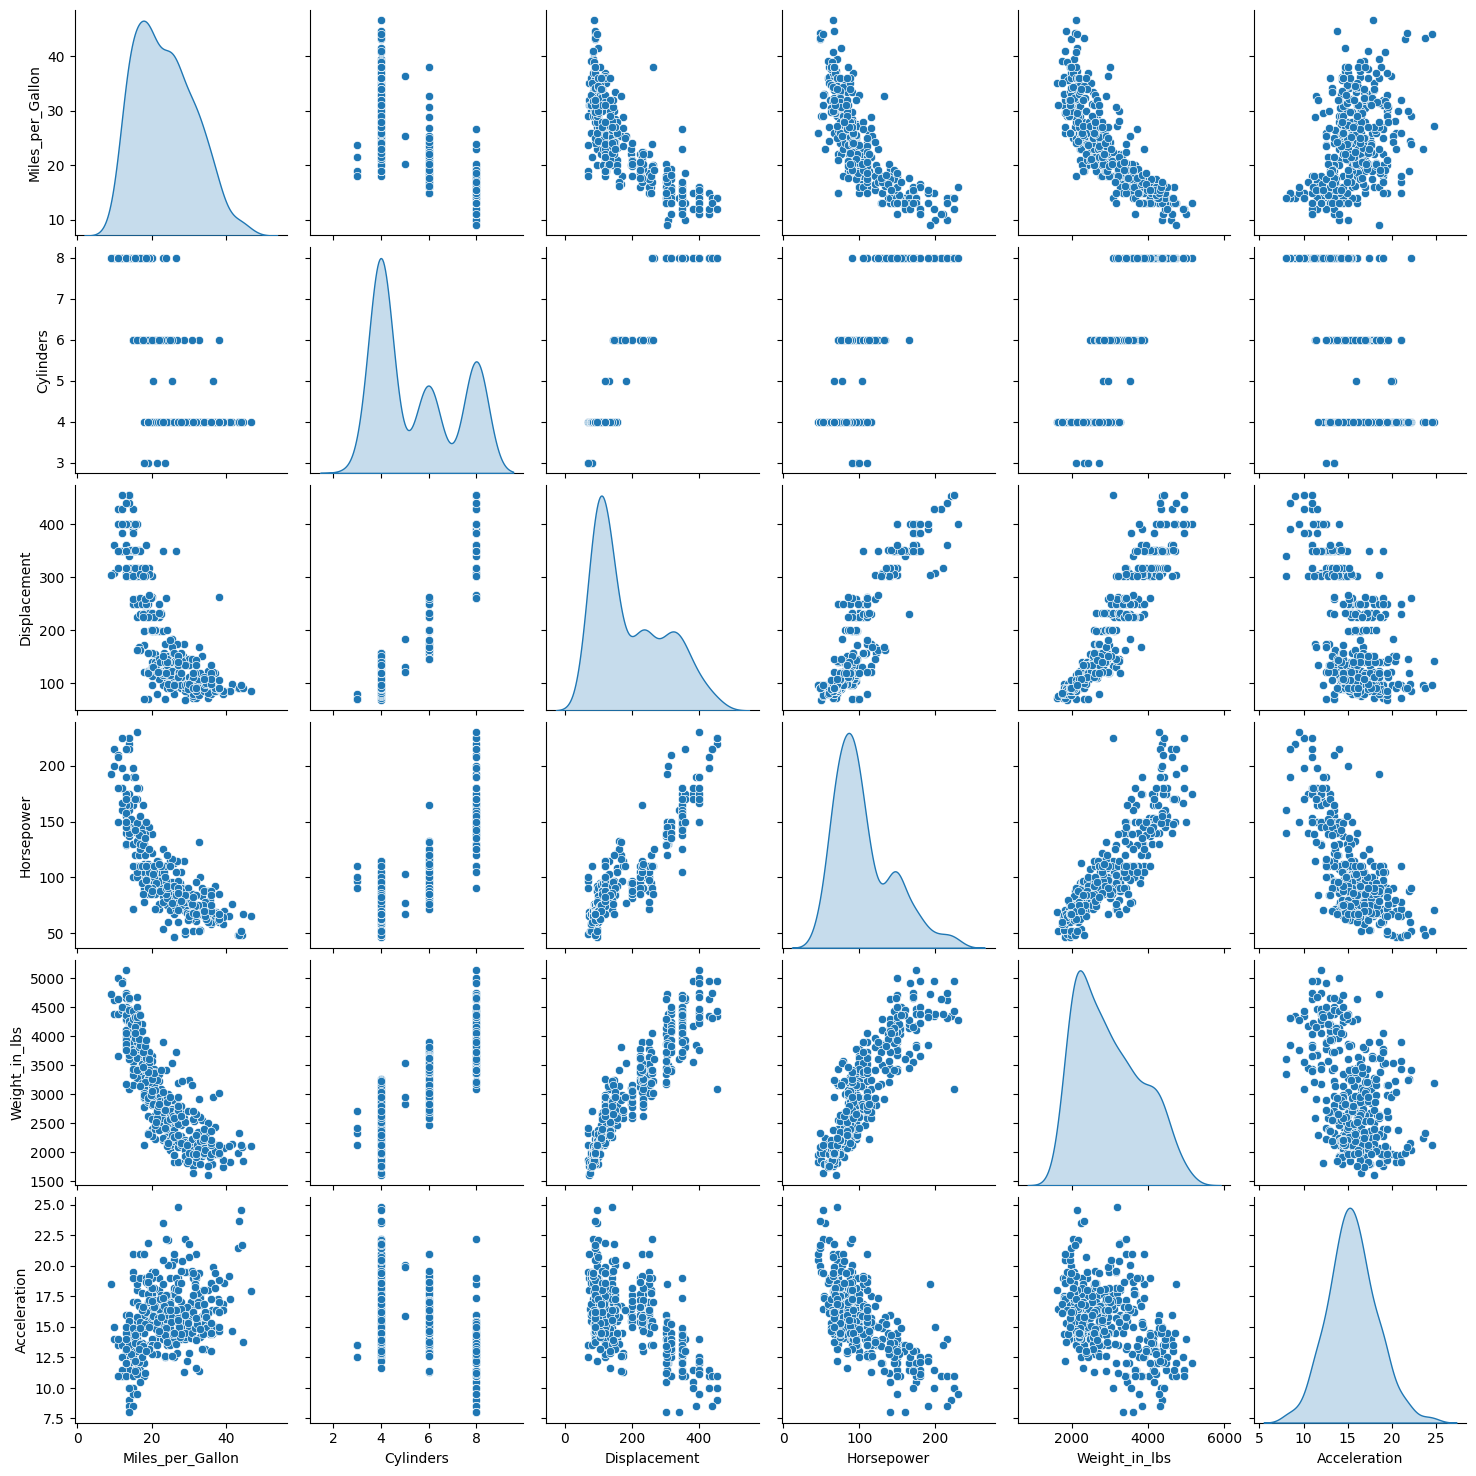

In [10]:
# Gráficos de dispersión (scatter plots) para algunas características
sns.pairplot(cars, diag_kind='kde')
plt.show()

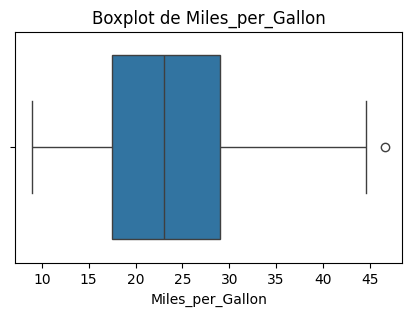

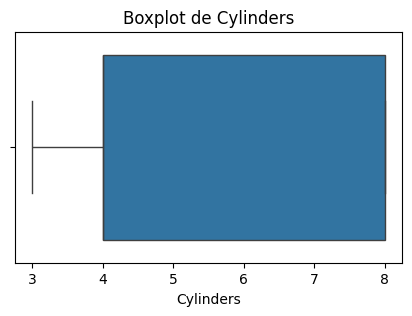

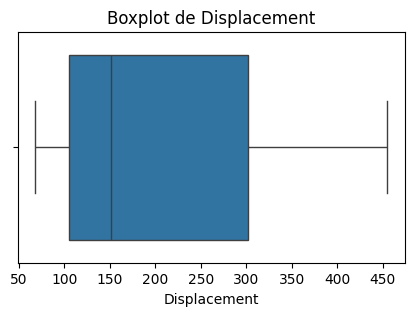

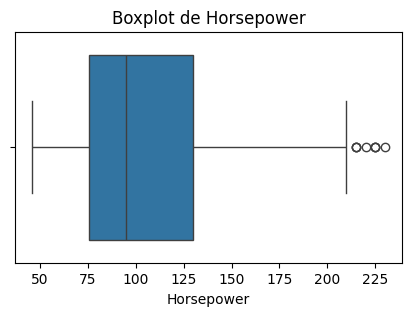

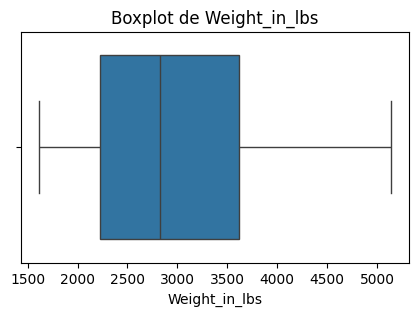

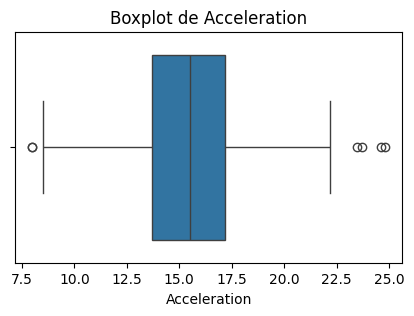

In [13]:
# Boxplots para detectar valores atípicos
# El boxplot identifica como outlier todo valor por encima de Q3+1.5×IQR o por debajo de Q1−1.5×IQR donde IQR=Q3−Q1
for column in cars.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=cars[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

# Distancia Euclidiana

In [21]:
import numpy as np

point1 = numeric_cars.iloc[1,].values
point2 = numeric_cars.iloc[2,].values

dist = np.linalg.norm(point1 - point2)

print(dist)

259.4364083932708


In [25]:
import math

print(math.dist(point1, point2))

259.4364083932708


In [23]:
def euclidean_distance(point1, point2):
    diff = point1 - point2
    distance = np.sqrt(np.sum(diff**2))
    return distance

euclidean_distance(point1, point2)

259.4364083932708

# Kmeans

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Eliminar nulos
numeric_cars_clean = numeric_cars.dropna()

# Normalización de datos
scaler = StandardScaler()
numeric_cars_scaled = scaler.fit_transform(numeric_cars_clean)

# Entrenamiento
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(numeric_cars_scaled)

# Resultados del modelo
print("Centroides de los clusters:")
print(kmeans.cluster_centers_)

print("\nEtiquetas asignadas a cada muestra:")
print(kmeans.labels_)

Centroides de los clusters:
[[ 0.76382895 -0.86110766 -0.81098162 -0.6843036  -0.79514908  0.36356374]
 [-0.46592926  0.33521362  0.22847796 -0.06927147  0.29302334  0.30812718]
 [-1.14393843  1.47184414  1.46979213  1.49145953  1.37493755 -1.05253303]]

Etiquetas asignadas a cada muestra:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 1 0 0 0 0 0 0 1 2 2 2 2 0 0 0 1 1 1 1 1
 2 2 2 2 2 2 2 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 0 2 2 2 2 1 0 0 0 0
 0 1 0 2 2 0 0 0 1 2 0 1 2 1 1 1 0 0 0 0 1 1 1 2 2 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 2 2 2 2 1 1 1 1 1 1 2 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 2 1 1 1 2 2 2 2 0 0 0 0 0 2 1 2
 2 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 2 2 1 1 1 0 1 1 1 1 1
 1 2 2 2 2 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 2 2 2 2 2 2 1 2 0 0 0 0 1
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0

# Partición Train y Test

In [28]:
from sklearn.model_selection import train_test_split
col_X=['Miles_per_Gallon',	'Cylinders',	'Displacement', 'Horsepower'	,'Weight_in_lbs',	'Acceleration']
col_Y=['Origin']
X_train, X_test, y_train, y_test = train_test_split(cars[col_X], cars[col_Y], test_size=0.3, random_state=42, shuffle=True)

In [29]:
X_train

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
304,25.4,5,183.0,77.0,3530,20.1
158,31.0,4,79.0,67.0,2000,16.0
109,26.0,4,97.0,46.0,1950,21.0
17,NaN,8,302.0,140.0,3353,8.0
237,15.5,8,350.0,170.0,4165,11.4
...,...,...,...,...,...,...
71,15.0,8,318.0,150.0,4135,13.5
106,18.0,6,232.0,100.0,2945,16.0
270,17.7,6,231.0,165.0,3445,13.4
348,23.5,6,173.0,110.0,2725,12.6


In [30]:
X_test

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
70,14.0,8,400.0,175.0,4385,12.0
218,16.5,6,168.0,120.0,3820,16.7
258,20.2,8,302.0,139.0,3570,12.8
33,11.0,8,318.0,210.0,4382,13.5
42,17.0,6,250.0,100.0,3329,15.5
...,...,...,...,...,...,...
302,35.7,4,98.0,80.0,1915,14.4
60,31.0,4,71.0,65.0,1773,19.0
79,15.0,8,304.0,150.0,3892,12.5
289,22.3,4,140.0,88.0,2890,17.3


In [31]:
y_train

,Origin
304,Europe
158,Europe
109,Europe
17,USA
237,USA
...,...
71,USA
106,USA
270,USA
348,USA


In [32]:
y_test

,Origin
70,USA
218,Europe
258,USA
33,USA
42,USA
...,...
302,USA
60,Japan
79,USA
289,USA


# Árbol de Decisión

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Entrenamiento del árbol de decisión
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.7459016393442623


# Gradient Boosting

In [37]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo Gradient Boosting
gb = HistGradientBoostingClassifier()
gb.fit(X_train, y_train)

# Predicciones
y_pred = gb.predict(X_test)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión del modelo: 0.8278688524590164
